<img src="https://blog.deskfy.io/wp-content/uploads/2019/04/sucesso-da-marca-ifood-descubra-o-segredo-800x450.png" width="150" height="150">

# iFood Challenge
<h3>Éverton Bin</h3>
<br>

## Table of Contents
### [1. Introduction](#intro)

### [2. Data Overview](#overview)
#### $\;\;\;\;$[2.1 Getting to Know the Data](#knowingdata)
#### $\;\;\;\;$[2.2 Feature Engineering](#feateng)
#### $\;\;\;\;\;\;\;\;$[2.2.1 Age](#age)
#### $\;\;\;\;\;\;\;\;$[2.2.2 Months Enrolled](#monthsenroll)
#### $\;\;\;\;\;\;\;\;$[2.2.3 Total Amount Spent](#totalamount)
#### $\;\;\;\;$[2.3 Treating NaN Values](#treatnan)

### [3. Exploratory Data Analysis](#eda)
#### $\;\;\;\;$[3.1 Products](#prods)
#### $\;\;\;\;$[3.2 Channels](#channs)
#### $\;\;\;\;$[3.3 Age](#age_analysis)
#### $\;\;\;\;$[3.4 Education](#edu)
#### $\;\;\;\;$[3.5 Income](#income)
#### $\;\;\;\;$[3.6 - Overall Amount Spent on Products](#amount)
#### $\;\;\;\;$[3.7 Marketing Campaigns Similarity](#campaigns)

### [4. Cluster Analysis](#clusteranalysis)
#### $\;\;\;\;$[4.1 Data Transformation](#datatrans)
#### $\;\;\;\;$[4.2 The Elbow Method](#elbow)
#### $\;\;\;\;$[4.3 Clustering Customers](#clustering)
#### $\;\;\;\;$[4.4 Analyzing Clusters](#clustergroups)
#### $\;\;\;\;\;\;\;\;$[4.4.1 The Traditional Shoppers](#clust0)
#### $\;\;\;\;\;\;\;\;$[4.4.2 The Family-Starters Occasional Shoppers](#clust1)
#### $\;\;\;\;\;\;\;\;$[4.4.3 The Light Shoppers](#clust2)
#### $\;\;\;\;\;\;\;\;$[4.4.4 The Well-Educated Occasional Shoppers](#clust3)
#### $\;\;\;\;$[4.5 Cluster Insights](#insights)

### [5. Optimizing Marketing Campaign](#optimize)
#### $\;\;\;\;$[5.1 Data Transformation Pipeline](#datapipe)
#### $\;\;\;\;$[5.2 Learning Curves](#learningcurves)
#### $\;\;\;\;$[5.3 Training and Evaluating the Models](#traineval)
#### $\;\;\;\;$[5.4 Feature Importance](#featimp)
#### $\;\;\;\;$[5.5 Second Attempt: GradientBoosting Classifier](#2ndattempt)

### [6. Recommendations](#recomm)
#### $\;\;\;\;$[6.1 Mobile App](#recomm1)
#### $\;\;\;\;$[6.2 Loyalty Program](#recomm2)
<br>

## 1. Introduction<a name="intro"></a>

#### The Company

Consider a well-established company operating in the retail food sector. Presently they have around
several hundred thousand registered customers and serve almost one million consumers a year.
They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially
prepared fish, and sweet products. These can further be divided into gold and regular products. The
customers can order and acquire products through 3 sales channels: physical stores, catalogs, and
the company’s website. Globally, the company had solid revenues and a healthy bottom line in the
past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this
reason, several strategic initiatives are being considered to invert this situation. One is to improve
the performance of marketing activities, with a special focus on marketing campaigns.

#### The Marketing Department

The marketing department was pressured to spend its annual budget more wisely. The CMO
perceives the importance of having a more quantitative approach when making decisions, reason why
a small team of data scientists was hired with a clear objective in mind: to build a predictive model
which will support direct marketing initiatives. Desirably, the success of these activities will prove the
value of the approach and convince the more skeptical within the company.

#### The Objective

The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at
selling a new gadget to the Customer Database. To build the model, a pilot campaign involving
2.240 customers were carried out. The customers were selected at random and contacted by phone
regarding the acquisition of the gadget. During the following months, customers who bought the
offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue
generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a
profit of -3.046MU. The success rate of the campaign was 15%. The objective is of the team is to
develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully, the model will allow the company to cherry-pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.

#### Data Dictionary:
* `AcceptedCmp1`: *1 if customer accepted the offer in the 1st campaign, 0 otherwise*;
* `AcceptedCmp2`: *1 if customer accepted the offer in the 2nd campaign, 0 otherwise*;
* `AcceptedCmp3`: *1 if customer accepted the offer in the 3rd campaign, 0 otherwise*;
* `AcceptedCmp4`: *1 if customer accepted the offer in the 4th campaign, 0 otherwise*;
* `AcceptedCmp5`: *1 if customer accepted the offer in the 5th campaign, 0 otherwise*;
* `Response`: *(**target**) 1 if customer accepted the offer in the last campaign, 0 otherwise*;
* `Complain`: *1 if customer complained in the last 2 years*;
* `DtCustomer`: *date of customer's enrollment with the company*;
* `Education`: *customer's level of education*;
* `Marital`: *customer's marital status*;
* `Kidhome`: *number of small children in customer's household*;
* `Teenhome`: *number of teenagers in customer's household*;
* `Income`: *customer's yearly household income*;
* `MntFishProducts`: *amount spent on fish products in the last 2 years*;
* `MntMeatProducts`: *amount spent on meat products in the last 2 years*;
* `MntFruits`: *amount spent on fruits products in the last 2 years*;
* `MntSweetProducts`: *amount spent on sweet products in the last 2 years*;
* `MntWines`: *amount spent on wines products in the last 2 years*;
* `MntGoldProds`: *amount spent on gold products in the last 2 years*;
* `NumDealsPurchases`: *number of purchases made with discount*;
* `NumCatalogPurchases`: *number of purchases made using catalog*;
* `NumStorePurchases`: *number of purchases made directly in stores*;
* `NumWebPurchases`: *number of purchases made through company's web site*;
* `NumWebVisitsMonth`: *number of visits to company's web site in the last month*;
* `Recency`: *number of days since the last purchase*.

In [1]:
# Importing libraries:
import numpy as np
import pandas as pd

from datetime import timedelta

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.cluster import KMeans

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import learning_curve

from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn general style:
sns.set_theme(style = "whitegrid", font_scale = 1.1)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Data Overview<a name="overview"></a>

### 2.1 Getting to Know the Data<a name="knowingdata"></a>

In [2]:
# Reading data:
cust_df = pd.read_csv('ml_project1_data.csv', parse_dates = [7])
cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Checking dataset numbers:
print('The dataset contains {} observations and {} different features.'.format(cust_df.shape[0], cust_df.shape[1]))
print('\nThere are {} unique customers.'.format(len(cust_df.ID.unique())))

The dataset contains 2240 observations and 29 different features.

There are 2240 unique customers.


In [4]:
# Checking nan values:
cust_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only the `Income` feature presents *nan* values, occurring in 24 observations.

These *nan* values will receive further treatment.

In [5]:
# Checking features dtypes:
cust_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

It looks good!

No *dtype* transformation will be applied for now.

In [6]:
# Checking general statistics part 1:
cust_df.iloc[:,1:13].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000


In [7]:
# Checking general statistics part 2:
cust_df.iloc[:,13:20].describe()

,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [8]:
# Checking general statistics part 3:
cust_df.iloc[:,20:].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We can see that the columns `Z_CostContact` and `Z_Revenue` represent constant values, not bringing useful information for this task. Also, they are not related in the data dictionary.

Because of that, both the features will be deleted:

In [9]:
# Deleting useless columns:
cust_df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)

In [10]:
# Checking Response balance:
print('Among the {} customers exposed to the marketing campaign, only {} had a positive response.'.format(cust_df.shape[0], 
                                                                                                          cust_df.Response.value_counts()[1]))
print('The positive response represents {:.2f}% of the customers.'.format((cust_df.Response.value_counts()[1] / cust_df.shape[0]) * 100))
print()

Among the 2240 customers exposed to the marketing campaign, only 334 had a positive response.
The positive response represents 14.91% of the customers.



### 2.2 Feature Engineering<a name="feateng"></a>

#### 2.2.1 Age<a name="age"></a>

The client's year of birth will be used to compute the client's age.

Given that the variables indicating the amount spent on different products correspond to a period of two years, we are going to consider that the ultimate date in the dataset corresponds to the minimum date related to the client's enrollment date plus 2 years.

In [11]:
# Minimum enrollment date:
min_enroll = min(cust_df.Dt_Customer)
min_enroll

Timestamp('2012-07-30 00:00:00')

In [12]:
# Computing assumed ultimate date in the dataset: 
ultimate_date = min_enroll + timedelta(days = 730)
ultimate_date

Timestamp('2014-07-30 00:00:00')

In [13]:
# Computing customer's age:
cust_df['Age'] = [ultimate_date.year - pd.Timestamp(str(cust_df.Year_Birth.iloc[i])).year for i in range(cust_df.shape[0])]

cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,33


#### 2.2.2 Months Enrolled<a name="monthsenroll"></a>

Since these observations represent values related to a period of two years and customers enrolled in different dates during this period, the first step will be to bring these values into a common ground, so they can be comparable.

To do that, values representing the total amount spent or the total number of purchases will be transformed into rates, given one common time unit. 

As an example, instead of saying that one client had a total amount spent on fish products in the last 2 years, we are going to say that she/he spent a computed rate per month-enrolled on fish products.

In [14]:
# Computing the number of months the client is enrolled with the company:
cust_df['MonthsEnrolled'] = [((ultimate_date - cust_df.Dt_Customer.iloc[i]).days) / 30 for i in range(cust_df.shape[0])]

With the number of months enrolled, we will compute average amount spent per month and average number of purchases per month:

In [15]:
# Average spending on fish products per month:
cust_df['avg_FishProds_per_month'] = [cust_df.MntFishProducts.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                      for i in range(cust_df.shape[0])]

# Average spending on meat products per month:
cust_df['avg_MeatProds_per_month'] = [cust_df.MntMeatProducts.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                      for i in range(cust_df.shape[0])]

# Average spending on fruits per month:
cust_df['avg_Fruits_per_month'] = [cust_df.MntFruits.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                   for i in range(cust_df.shape[0])]

# Average spending on sweet products per month:
cust_df['avg_SweetProds_per_month'] = [cust_df.MntSweetProducts.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                       for i in range(cust_df.shape[0])]

# Average spending on wines per month:
cust_df['avg_Wines_per_month'] = [cust_df.MntWines.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                  for i in range(cust_df.shape[0])]

# Average spending on gold products per month:
cust_df['avg_GoldProds_per_month'] = [cust_df.MntGoldProds.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                      for i in range(cust_df.shape[0])]

# Average number of catalog purchases per month:
cust_df['avg_CatalogPrch_per_month'] = [cust_df.NumCatalogPurchases.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                        for i in range(cust_df.shape[0])]

# Average number of deals purchases per month:
cust_df['avg_DealsPrch_per_month'] = [cust_df.NumDealsPurchases.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                      for i in range(cust_df.shape[0])]

# Average number of store purchases per month:
cust_df['avg_StorePrch_per_month'] = [cust_df.NumStorePurchases.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                      for i in range(cust_df.shape[0])]

# Average number of web purchases per month:
cust_df['avg_WebPrch_per_month'] = [cust_df.NumWebPurchases.iloc[i] / cust_df.MonthsEnrolled.iloc[i] \
                                    for i in range(cust_df.shape[0])]

#### 2.2.3 Total Amount Spent<a name="totalamount"></a>

In [16]:
# Creating total amount spent column:
cust_df['Total_Amount_Spent'] = [cust_df.MntFishProducts[i] + cust_df.MntMeatProducts[i] + cust_df.MntFruits[i] + \
                                 cust_df.MntSweetProducts[i] + cust_df.MntWines[i] + cust_df.MntGoldProds[i] \
                                 for i in range(cust_df.shape[0])]

# Average amount spent per month:
cust_df['Avg_Amount_Spent_per_month'] = [cust_df.Total_Amount_Spent[i] / cust_df.MonthsEnrolled[i] \
                                         for i in range(cust_df.shape[0])]

In [17]:
# Checking dataframe with new features:
cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,avg_Fruits_per_month,avg_SweetProds_per_month,avg_Wines_per_month,avg_GoldProds_per_month,avg_CatalogPrch_per_month,avg_DealsPrch_per_month,avg_StorePrch_per_month,avg_WebPrch_per_month,Total_Amount_Spent,Avg_Amount_Spent_per_month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3.804035,3.804035,27.449568,3.804035,0.432277,0.129683,0.172911,0.345821,1617,69.899135
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0.208333,0.208333,2.291667,1.250000,0.208333,0.416667,0.416667,0.208333,27,5.625000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4.285714,1.836735,37.259475,3.673469,0.174927,0.087464,0.874636,0.699708,776,67.871720
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0.705882,0.529412,1.941176,0.882353,0.000000,0.352941,0.705882,0.352941,53,9.352941
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6.718750,4.218750,27.031250,2.343750,0.468750,0.781250,0.937500,0.781250,422,65.937500


### 2.3 Treating NaN Values<a name="treatnan"></a>

In this case, since there's only about 1% of the *nan* values in the `Income` feature, these values will be imputed with the **median** income, considering:
* the education level;
* and the marital status.

In [18]:
# Computing the median Income for each combinantion of Education and Marital Status:
median_incomes = cust_df.groupby(['Education', 'Marital_Status']).Income.median()

# Creating a list with Income imputation values:
income_imputations = list()

# Selecting observations with nan Income values:
nan_income_obs = cust_df[cust_df.Income.isnull()]

# Looping through nan Income observations:
for i in range(nan_income_obs.shape[0]):
    income = median_incomes[nan_income_obs.Education.iloc[i]][nan_income_obs.Marital_Status.iloc[i]]
    income_imputations.append(income)

In [19]:
# Applying Income imputations:
nan_index = list(nan_income_obs.index.values)

for i in range(len(nan_index)):
    cust_df.at[nan_index[i], 'Income'] = income_imputations[i]

In [20]:
# Checking nan values:
cust_df.isnull().sum()

ID                            0
Year_Birth                    0
Education                     0
Marital_Status                0
Income                        0
Kidhome                       0
Teenhome                      0
Dt_Customer                   0
Recency                       0
MntWines                      0
MntFruits                     0
MntMeatProducts               0
MntFishProducts               0
MntSweetProducts              0
MntGoldProds                  0
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             0
NumWebVisitsMonth             0
AcceptedCmp3                  0
AcceptedCmp4                  0
AcceptedCmp5                  0
AcceptedCmp1                  0
AcceptedCmp2                  0
Complain                      0
Response                      0
Age                           0
MonthsEnrolled                0
avg_FishProds_per_month       0
avg_MeatProds_per_month       0
avg_Frui

## 3. Exploratory Data Analysis<a name="eda"></a>

This EDA task will be guided by a few questions:
* On which product do customers spend more money?
* Which channel is responsible for most of the sellings?
* Are there significant differences between customers that respond or not to marketing campaigns?
* Are there any relationships among the customers that responded to different marketing campaigns?

### 3.1 Products<a name="prods"></a>

In [21]:
# Creating Products dataframe:
prods = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
prods_df = pd.melt(cust_df, id_vars = ['Response'], value_vars = prods, var_name = 'Product', value_name='Amount')

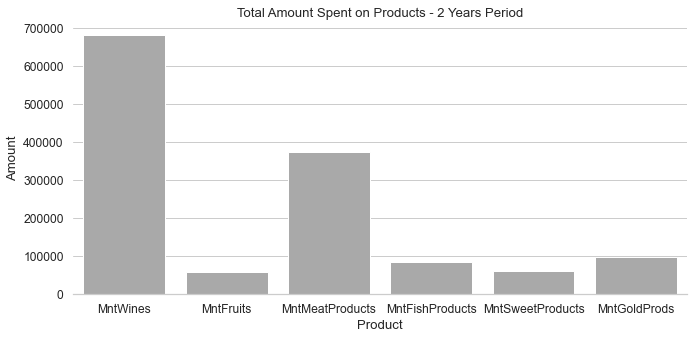

In [22]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11, 5))

# Defining barplot:
sns.barplot(x = 'Product', 
            y = 'Amount', 
            estimator = sum, 
            data = prods_df, 
            ci = None, 
            color = 'darkgray', 
            ax = ax).set(
    title = 'Total Amount Spent on Products - 2 Years Period')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot1.png')

# Showing the figure:
fig.show()

We can see that the overall largest amount of money is spent on **wines** and **meat products**.

**Fruits** represent the product on which customers spend the lower amount of money in the period of two years.

In [23]:
# Creating Avg Products dataframe:
avg_prods = ['avg_Wines_per_month', 'avg_Fruits_per_month', 'avg_MeatProds_per_month', 'avg_FishProds_per_month', 
             'avg_SweetProds_per_month', 'avg_GoldProds_per_month']
avg_prods_df = pd.melt(cust_df, id_vars = ['Response'], value_vars = avg_prods, var_name = 'Product', 
                       value_name = 'Avg_Monthly_Amount')

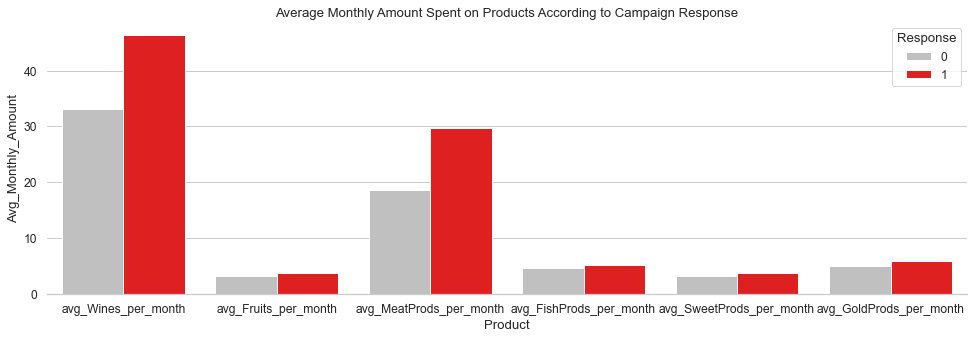

In [24]:
# Definig palette according to the Response feature:
palette = {0: 'silver', 1: 'red'}

# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16.5, 5))

# Defining barplot:
sns.barplot(x = 'Product', 
            y = 'Avg_Monthly_Amount', 
            hue = 'Response', 
            data = avg_prods_df, 
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Average Monthly Amount Spent on Products According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot2.png')

# Showing the figure:
fig.show()

There's a tendency that customers who are responsive to the campaign spend higher monthly amounts on all the products offered by the company, but this tendency is more clear when observing average monthly amounts spent on **wines** and **meat products**.

It could indicate that these clients might be more **connected to the brand**, and might genuinely **like the company's products**, which results in more frequent or more robust purchases. 

They might be associated with a more **traditional profile**, considering their preferences on wines and meat.

### 3.2 Channels<a name="channs"></a>

In [25]:
# Creating Channels dataframe:
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channels_df = pd.melt(cust_df, id_vars = ['Response'], value_vars = channels, var_name = 'Channel', value_name='Num_Purchases')

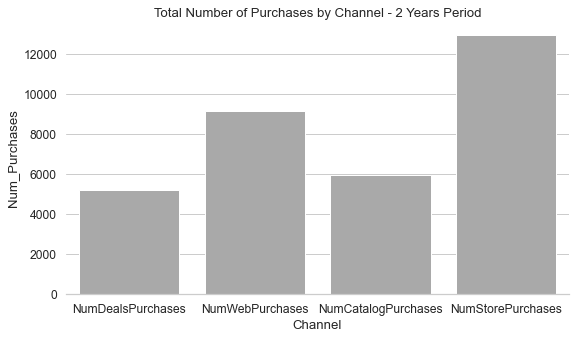

In [26]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9, 5))

# Defining barplot:
sns.barplot(x = 'Channel', 
            y = 'Num_Purchases', 
            estimator = sum, 
            data = channels_df, 
            ci = None, 
            color = 'darkgray', 
            ax = ax).set(
    title = 'Total Number of Purchases by Channel - 2 Years Period')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot3.png')

# Showing the figure:
fig.show()

Most of the purchases are made **directly in stores**, being the website the second most common channel used for purchases in the period represented in the dataset.

In [27]:
# Creating Channels dataframe:
avg_channels = ['avg_DealsPrch_per_month', 'avg_WebPrch_per_month', 'avg_CatalogPrch_per_month', 'avg_StorePrch_per_month']
avg_channels_df = pd.melt(cust_df, id_vars = ['Response'], value_vars = avg_channels, var_name = 'Channel', 
                          value_name='Avg_Monthly_Purchases')

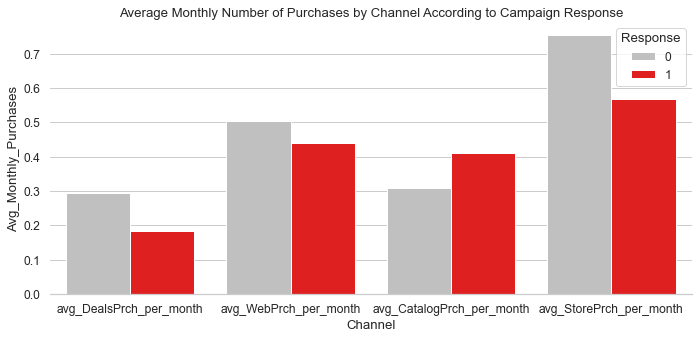

In [28]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11.5, 5))

# Defining barplot:
sns.barplot(x = 'Channel', 
            y = 'Avg_Monthly_Purchases', 
            hue = 'Response', 
            data = avg_channels_df, 
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Average Monthly Number of Purchases by Channel According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot4.png')

# Showing the figure:
fig.show()

It is possible to say that clients who responded to the last campaign have a higher rate of **monthly purchases using catalogs**.

Although they don't stand out when it comes to **web purchase**, they are almost **equally represented** when comparing to the customers that didn't respond to the campaign.

It's interesting to see that **store and deal purchasers** have a clear **underrepresentation** among customers that responded to the last campaign. 

In other words, the marketing campaign might be boosting catalog purchases, or maybe these **campaigns** are being **publicized through the company's catalogs**. In the last case, it should be considered **publicizing** the campaigns **through different channels** to achieve more customers.

### 3.3 Age<a name="age_analysis"></a>

The ages will be analyzed through two different perspectives:
* the average age;
* comparing the occurrence of different age groups.

In [29]:
print('Overall customers:')
print('------------------')
print("Company's customers are on average {:.1f} years old.".format(cust_df.Age.describe()['mean']))
print('The median age corresponds to {} years old.'.format(cust_df.Age.describe()['50%']))

print('\nCustomers who were not responsive to the campaign:')
print('--------------------------------------------------')
print('Average age: {:.1f};'.format(cust_df.groupby(['Response']).Age.mean()[0]))
print('Median age: {}.'.format(cust_df.groupby(['Response']).Age.median()[0]))

print('\nCustomers who were responsive to the campaign:')
print('----------------------------------------------')
print('Average age: {:.1f};'.format(cust_df.groupby(['Response']).Age.mean()[1]))
print('Median age: {}.'.format(cust_df.groupby(['Response']).Age.median()[1]))

Overall customers:
------------------
Company's customers are on average 45.2 years old.
The median age corresponds to 44.0 years old.

Customers who were not responsive to the campaign:
--------------------------------------------------
Average age: 45.3;
Median age: 44.

Customers who were responsive to the campaign:
----------------------------------------------
Average age: 44.6;
Median age: 43.


In [30]:
# Checking Age quartiles:
cust_df.Age.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

Following the observed age distribution, age groups will be segmented as shown below:
* less than 30 years old;
* 30 - 39 years old;
* 40 - 49 years old;
* 50 - 59 years old;
* more than or equal to 60 years old.

In [31]:
# Creating Age Group feature:
cust_df['Age_Group'] = ['<30' if cust_df.Age[i] < 30 \
                        else '30-39' if 30 <= cust_df.Age[i] < 40 \
                        else '40-49' if 40 <= cust_df.Age[i] < 50 \
                        else '50-59' if 50 <= cust_df.Age[i] < 60 \
                        else '>=60' \
                        for i in range(cust_df.shape[0])]

In [32]:
# Creating Age Group dataframe:
age_df = pd.DataFrame(columns = ['Age_Group', 'Count', 'Percentage'])
age_df['Age_Group'] = cust_df.groupby('Age_Group').ID.count().index.values
age_df['Count'] = cust_df.groupby('Age_Group').ID.count().values
age_df['Percentage'] = [(age_df.Count[i] / sum(age_df.Count)) * 100 for i in range(age_df.shape[0])]

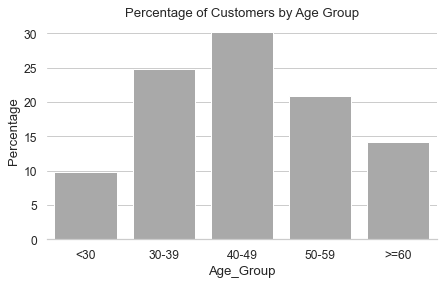

In [33]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 4))

# Defining barplot:
sns.barplot(x = 'Age_Group', 
            y = 'Percentage', 
            data = age_df, 
            order = ['<30', '30-39', '40-49', '50-59', '>=60'], 
            color = 'darkgray', 
            ax = ax).set(
    title = 'Percentage of Customers by Age Group')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot5.png')

# Showing the figure:
fig.show()

It's possible to see that **young** clients represent **the lowest portion** of customers. 

**Over 50%** of the clients are **between 30 and 49 years old**. If we include customers that are between 50 and 59 years old, these clients represent about 75% of the company's customers.

In [34]:
# Creating Age Group dataframe by Response:
# 0
age0_df = pd.DataFrame(columns = ['Age_Group', 'Percentage'])
age0_df['Age_Group'] = cust_df[cust_df.Response == 0].Age_Group.value_counts(normalize = True).index.values
age0_df['Percentage'] = cust_df[cust_df.Response == 0].Age_Group.value_counts(normalize = True).values
age0_df['Response'] = 0

# 1:
age1_df = pd.DataFrame(columns = ['Age_Group', 'Percentage'])
age1_df['Age_Group'] = cust_df[cust_df.Response == 1].Age_Group.value_counts(normalize = True).index.values
age1_df['Percentage'] = cust_df[cust_df.Response == 1].Age_Group.value_counts(normalize = True).values
age1_df['Response'] = 1

# Concatenating:
age_resp_df = pd.concat([age0_df, age1_df], ignore_index = True)
age_resp_df['Percentage'] = age_resp_df['Percentage'] * 100

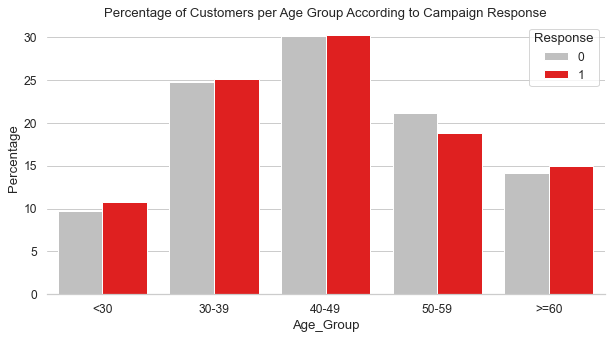

In [35]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

# Defining barplot:
sns.barplot(x = 'Age_Group', 
            y = 'Percentage', 
            hue = 'Response',
            data = age_resp_df,
            order = ['<30', '30-39', '40-49', '50-59', '>=60'],
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Percentage of Customers per Age Group According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot6.png')

# Showing the figure:
fig.show()

In terms of the marketing campaign, no age group is especially affected by it. 

Proportionally, **all age groups are equally responsive** to the marketing campaign.

### 3.4 Education<a name="edu"></a>

In [36]:
# Creating Education dataframe:
edu_df = pd.DataFrame(columns = ['Education', 'Percentage'])
edu_df['Education'] = cust_df.Education.value_counts(normalize = True).index.values
edu_df['Percentage'] = cust_df.Education.value_counts(normalize = True).values * 100

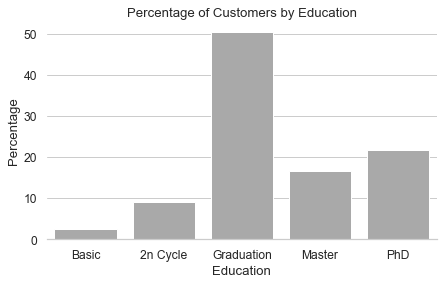

In [37]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 4))

# Defining barplot:
sns.barplot(x = 'Education', 
            y = 'Percentage', 
            data = edu_df, 
            order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], 
            color = 'darkgray', 
            ax = ax).set(
    title = 'Percentage of Customers by Education')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot7.png')

# Showing the figure:
fig.show()

The customers of the company are **well-educated**. 50% of them have a Graduation degree, and over 20% have a PhD.

People with Basic and 2nd Cycle Education represent about 10% of the customers.

In [38]:
# Creating Education dataframe by Response:
# 0
edu0_df = pd.DataFrame(columns = ['Education', 'Percentage'])
edu0_df['Education'] = cust_df[cust_df.Response == 0].Education.value_counts(normalize = True).index.values
edu0_df['Percentage'] = cust_df[cust_df.Response == 0].Education.value_counts(normalize = True).values * 100
edu0_df['Response'] = 0

# 1:
edu1_df = pd.DataFrame(columns = ['Education', 'Percentage'])
edu1_df['Education'] = cust_df[cust_df.Response == 1].Education.value_counts(normalize = True).index.values
edu1_df['Percentage'] = cust_df[cust_df.Response == 1].Education.value_counts(normalize = True).values * 100
edu1_df['Response'] = 1

# Concatenating:
edu_resp_df = pd.concat([edu0_df, edu1_df], ignore_index = True)

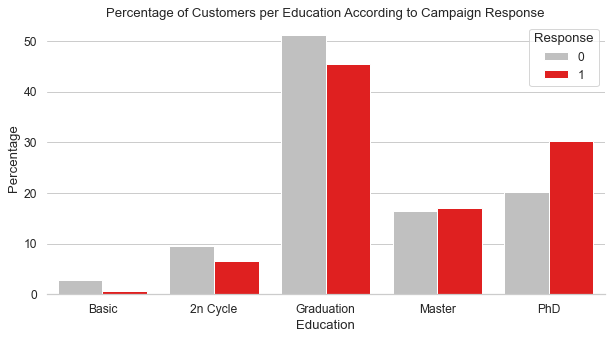

In [39]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

# Defining barplot:
sns.barplot(x = 'Education', 
            y = 'Percentage', 
            hue = 'Response',
            data = edu_resp_df,
            order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'],
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Percentage of Customers per Education According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot8.png')

# Showing the figure:
fig.show()

Customers with a **PhD** are proportionally more likely to respond to the marketing campaign. This group is overrepresented when comparing to clients that didn't respond to the campaign.

It could be studied if the language used in the campaign reaches out more effectively to people with higher educational degrees or if these people are more likely to use the store channels where these marketing campaigns are more visible. 

### 3.5 Income<a name="income"></a>

In [40]:
print('Overall customers:')
print('------------------')
print('The household annual income is, on average, {:.2f}.'.format(cust_df.Income.describe()['mean']))
print('The median household annual income is {}.'.format(cust_df.Income.describe()['50%']))

print('\nCustomers who were not responsive to the campaign:')
print('--------------------------------------------------')
print('Average annual income: {:.1f};'.format(cust_df.groupby(['Response']).Income.mean()[0]))
print('Median annual income: {}.'.format(cust_df.groupby(['Response']).Income.median()[0]))

print('\nCustomers who were responsive to the campaign:')
print('----------------------------------------------')
print('Average annual income: {:.1f};'.format(cust_df.groupby(['Response']).Income.mean()[1]))
print('Median annual income: {}.'.format(cust_df.groupby(['Response']).Income.median()[1]))

Overall customers:
------------------
The household annual income is, on average, 52231.86.
The median household annual income is 51222.5.

Customers who were not responsive to the campaign:
--------------------------------------------------
Average annual income: 50838.4;
Median annual income: 50138.5.

Customers who were responsive to the campaign:
----------------------------------------------
Average annual income: 60183.7;
Median annual income: 64044.0.


In [41]:
# Checking Income quartiles:
cust_df.Income.describe()

count      2240.000000
mean      52231.860714
std       25039.866195
min        1730.000000
25%       35538.750000
50%       51222.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

Income will be divided into eight groups:
* less than 20.000 household income;
* 20.000 - 29.999,99 household income;
* 30.000 - 39.999,99 household income;
* 40.000 - 49.999,99 household income;
* 50.000 - 59.999,99 household income;
* 60.000 - 69.999,99 household income;
* 70.000 - 79.999,99 household income;
* more than or equal to 80.000 annual income.

In [42]:
# Creating Income Group feature:
cust_df['Income_Group'] = ['<20.000' if cust_df.Income[i] < 20000 \
                           else '20.000-29.999' if 20000 <= cust_df.Income[i] < 30000 \
                           else '30.000-39.999' if 30000 <= cust_df.Income[i] < 40000 \
                           else '40.000-49.999' if 40000 <= cust_df.Income[i] < 50000 \
                           else '50.000-59.999' if 50000 <= cust_df.Income[i] < 60000 \
                           else '60.000-69.999' if 60000 <= cust_df.Income[i] < 70000 \
                           else '70.000-79.999' if 70000 <= cust_df.Income[i] < 80000 \
                           else '>=80.000' \
                           for i in range(cust_df.shape[0])]

In [43]:
# Creating Income Group dataframe:
income_df = pd.DataFrame(columns = ['Income', 'Percentage'])
income_df['Income'] = cust_df.Income_Group.value_counts(normalize = True).index.values
income_df['Percentage'] = cust_df.Income_Group.value_counts(normalize = True).values * 100

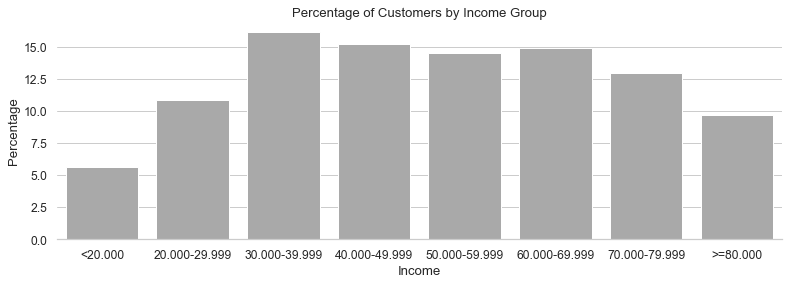

In [44]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 4))

# Defining barplot:
sns.barplot(x = 'Income', 
            y = 'Percentage', 
            data = income_df, 
            order = ['<20.000', '20.000-29.999', '30.000-39.999', '40.000-49.999', 
                     '50.000-59.999', '60.000-69.999', '70.000-79.999', '>=80.000'], 
            color = 'darkgray', 
            ax = ax).set(
    title = 'Percentage of Customers by Income Group')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot9.png')

# Showing the figure:
fig.show()

We can see that the company's customers are mostly related to **medium and high incomes**.

About 75% of the customers have an annual household income higher than 35k and about 50% of the customers higher than 50k.

In [45]:
# Creating Income dataframe by Response:
# 0
inc0_df = pd.DataFrame(columns = ['Income', 'Percentage'])
inc0_df['Income'] = cust_df[cust_df.Response == 0].Income_Group.value_counts(normalize = True).index.values
inc0_df['Percentage'] = cust_df[cust_df.Response == 0].Income_Group.value_counts(normalize = True).values * 100
inc0_df['Response'] = 0

# 1:
inc1_df = pd.DataFrame(columns = ['Income', 'Percentage'])
inc1_df['Income'] = cust_df[cust_df.Response == 1].Income_Group.value_counts(normalize = True).index.values
inc1_df['Percentage'] = cust_df[cust_df.Response == 1].Income_Group.value_counts(normalize = True).values * 100
inc1_df['Response'] = 1

# Concatenating:
inc_resp_df = pd.concat([inc0_df, inc1_df], ignore_index = True)

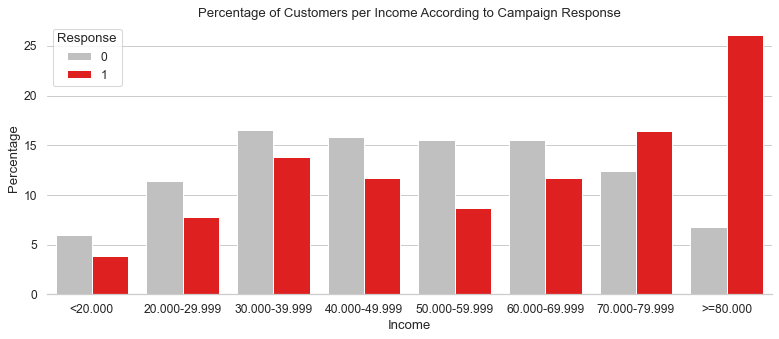

In [46]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))

# Defining barplot:
sns.barplot(x = 'Income', 
            y = 'Percentage', 
            hue = 'Response',
            data = inc_resp_df,
            order = ['<20.000', '20.000-29.999', '30.000-39.999', '40.000-49.999', 
                     '50.000-59.999', '60.000-69.999', '70.000-79.999', '>=80.000'],
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Percentage of Customers per Income According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot10.png')

# Showing the figure:
fig.show()

We can see a huge **overrepresentation** of customers earning **over 80k** among the ones that were responsive to the campaign.

They represent about 10% of the customers and about 6% among customers that didn't respond to the campaign. However, when considering the customers that **were responsive** to the campaign, they represent **over 25%**.

Customers with a household income between 70k and 79k are also overrepresented on a lower scale.

Once again, it should be studied whether customers related to higher incomes are using channels that expose them more to the campaigns or if the language used in the campaigns is more related to these groups.

### 3.6 - Overall Amount Spent on Products<a name="amount"></a>

In [47]:
print('The total revenue in this period of two years was {} MU.'.format(sum(cust_df.Total_Amount_Spent)))
print("\nOn average, each customer spents about {:.2f} MU per month on the company's products."\
      .format(sum(cust_df.Avg_Amount_Spent_per_month) / cust_df.shape[0]))

The total revenue in this period of two years was 1356988 MU.

On average, each customer spents about 71.76 MU per month on the company's products.


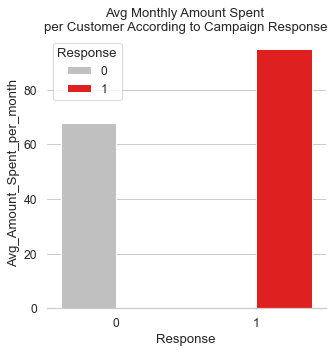

In [48]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))

# Defining barplot:
sns.barplot(x = 'Response', 
            y = 'Avg_Amount_Spent_per_month', 
            hue = 'Response',
            data = cust_df,
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Avg Monthly Amount Spent \nper Customer According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot11.png')

# Showing the figure:
fig.show()

We can see that customers with higher monthly amounts spent on products are more likely to respond to the marketing campaign:
* clients with an average amount lower than the average monthly amount aren't likely to respond to the campaign;
* clients with an average amount higher than the average monthly amount are more likely to respond to the campaign.

### 3.7 Marketing Campaigns Similarity<a name="campaigns"></a>

The purpose is to discover whether or not the customers that responded to the previous marketing campaign are the same customers that responded to the last campaign.

Considering the total number of customers that responded to a previous campaign, we are going to compute the percentage of them that also responded to the last campaign:

In [49]:
# Defining function to compare previous and last marketing campaign responses:
def compare_campaign_response(campaign1, campaign2):
    '''
    It computes the percentage of customers that responded to both campaigns.
    
    Inputs:
    campaign1: string, column name indicating campaign1 response;
    campaign2: string, column name indicating campaign2 response.
    '''
    # Computing mutual response:
    series_response = cust_df[cust_df[campaign1] == 1][campaign2].value_counts()
    mutual_response = series_response[1]
    
    # Computing the total response for campaign 1:
    total_resp1 = series_response[0] + series_response[1]

    # Computing the percentage of customers that responded to both campaigns:
    common_perc = (mutual_response / total_resp1) * 100
    
    # Printing result:
    print('{:.1f}% of the customers that responded to both campaigns.'.format(common_perc))

In [50]:
print('1st Campaign vs. Last Campaign:')
print('-------------------------------')
compare_campaign_response('AcceptedCmp1', 'Response')

print('\n2nd Campaign vs. Last Campaign:')
print('-------------------------------')
compare_campaign_response('AcceptedCmp2', 'Response')

print('\n3rd Campaign vs. Last Campaign:')
print('-------------------------------')
compare_campaign_response('AcceptedCmp3', 'Response')

print('\n4th Campaign vs. Last Campaign:')
print('-------------------------------')
compare_campaign_response('AcceptedCmp4', 'Response')

print('\n5th Campaign vs. Last Campaign:')
print('-------------------------------')
compare_campaign_response('AcceptedCmp5', 'Response')

print('\nComplain vs. Last Campaign:')
print('---------------------------')
compare_campaign_response('Complain', 'Response')

1st Campaign vs. Last Campaign:
-------------------------------
54.9% of the customers that responded to both campaigns.

2nd Campaign vs. Last Campaign:
-------------------------------
66.7% of the customers that responded to both campaigns.

3rd Campaign vs. Last Campaign:
-------------------------------
47.2% of the customers that responded to both campaigns.

4th Campaign vs. Last Campaign:
-------------------------------
37.1% of the customers that responded to both campaigns.

5th Campaign vs. Last Campaign:
-------------------------------
56.4% of the customers that responded to both campaigns.

Complain vs. Last Campaign:
---------------------------
14.3% of the customers that responded to both campaigns.


Although there's no guarantee that customers with a previous positive response to marketing campaign are more likely to respond to a future campaign if we consider the 1st, 2nd, and 5th campaign in comparison to the last campaign, we can see that **over 50% of them responded to both marketing campaigns**.

The third campaign showed a mutual response close to 50% and the 4th campaign showed the lowest mutual response percentage (37%) when comparing to the last campaign.

Also, we could see that only 14% of the customers who complained during this period of 2 years have responded to the last marketing campaign.

With that in mind, it will be created one new column indicating the total number of previous campaign response for each customer:

In [51]:
# Creating total previous response column:
cust_df['Total_Prev_Response'] = [cust_df.AcceptedCmp1[i] + cust_df.AcceptedCmp2[i] + cust_df.AcceptedCmp3[i] + \
                                  cust_df.AcceptedCmp4[i] + cust_df.AcceptedCmp5[i] \
                                  for i in range(cust_df.shape[0])]

# Checking the result:
cust_df.Total_Prev_Response.value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Total_Prev_Response, dtype: int64

We can see that none of the customers responded to all 5 marketing campaigns, 11 customers responded to 4 campaigns, and 325 have only responded to one of the campaigns.

On the other hand, 1777 customers haven't answered any of the marketing campaigns during this period, representing almost 80% of the clients.

In [52]:
# Checking how many customers that hadn't responded to other campaigns, responded to the last one:
cust_df[cust_df.Total_Prev_Response == 0].Response.value_counts()

0    1631
1     146
Name: Response, dtype: int64

In [53]:
# Checking the total number of customers that responded to the last campaign:
cust_df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

It's curious to see that **about 45% of the customers who responded to the last campaign hadn't responded to any other campaign before**.

Let's check now which campaign was more successful during this period:

In [54]:
# Creating Campaign dataframe:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaigns_df = pd.melt(cust_df, id_vars = ['ID'], value_vars = campaigns, 
                       var_name = 'Campaign', value_name='Camp_Response')

campaigns_df.groupby('Campaign').Camp_Response.sum()

Campaign
AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
Response        334
Name: Camp_Response, dtype: int64

The worst marketing campaign was the second one, with only 30 respondents.

The other previous campaign performed similarly. The **last campaign** is by far the one with the **highest potential**, reaching out to 50% more customers than the 4th campaign, which so far had resulted in the highest number of positive responses.

## 4. Cluster Analysis<a name="clusteranalysis"></a>

### 4.1 Data Transformation<a name="datatrans"></a>

To proceed with the clustering process, we are going to select the features and apply a few transformations:
* categorical columns will be binarized using *get_dummies*;
* numerical features will be standardized using *StandardScaler*.

In [55]:
# Columns selection:
# All the selected columns:
clust_cols = ['Age_Group', 'Education', 'Income_Group', 'Marital_Status', 'Kidhome', 'Recency', 'Teenhome', 
              'avg_FishProds_per_month', 'avg_MeatProds_per_month', 'avg_Fruits_per_month', 'avg_SweetProds_per_month', 
              'avg_Wines_per_month', 'avg_GoldProds_per_month', 'avg_CatalogPrch_per_month', 'avg_DealsPrch_per_month', 
              'avg_StorePrch_per_month', 'avg_WebPrch_per_month', 'Total_Prev_Response', 'Complain']

# Categorical features:
clust_cat_cols = ['Age_Group', 'Education', 'Income_Group', 'Marital_Status']

# Numerical features:
clust_num_cols = ['Kidhome', 'Recency', 'Teenhome', 'avg_FishProds_per_month', 'avg_MeatProds_per_month', 
                  'avg_Fruits_per_month', 'avg_SweetProds_per_month', 'avg_Wines_per_month', 'avg_GoldProds_per_month', 
                  'avg_CatalogPrch_per_month', 'avg_DealsPrch_per_month', 'avg_StorePrch_per_month', 'avg_WebPrch_per_month', 
                  'Total_Prev_Response']

In [56]:
# Defining function to apply data transformations:
def apply_data_transformation(df):
    '''
    It selects specific columns, applies get_dummies method to the categorical features, and standardizes
    numerical features using StandardScaler.
    
    Input:
    df: original dataframe.
    
    Output:
    trans_df: dataframe after transformations.
    '''
    # Selecting columns:
    trans_df = df[clust_cols]
    
    # Applying categorical transformation:
    for cat in clust_cat_cols:
        # Delete original column and cocatenate dummy columns:
        trans_df = pd.concat([trans_df.drop(cat, axis = 1), pd.get_dummies(trans_df[cat], prefix = cat, \
                                                                           prefix_sep = '_')], axis = 1)
        
    # Applying numerical transformation:
    scaler = StandardScaler()
    trans_df[clust_num_cols] = scaler.fit_transform(trans_df[clust_num_cols])
    
    return trans_df

In [57]:
# Applying transformations:
cluster_df = apply_data_transformation(cust_df)

cluster_df.head()

,Kidhome,Recency,Teenhome,avg_FishProds_per_month,avg_MeatProds_per_month,avg_Fruits_per_month,avg_SweetProds_per_month,avg_Wines_per_month,avg_GoldProds_per_month,avg_CatalogPrch_per_month,...,Income_Group_<20.000,Income_Group_>=80.000,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.825218,0.307039,-0.929894,0.214187,0.076064,0.060757,0.067004,-0.121127,-0.106500,0.177224,...,0,0,0,0,0,0,1,0,0,0
1,1.032559,-0.383664,0.906934,-0.341560,-0.431885,-0.361203,-0.380877,-0.516491,-0.321829,-0.189656,...,0,0,0,0,0,0,1,0,0,0
2,-0.825218,-0.798086,-0.929894,0.394194,-0.207868,0.117283,-0.178043,0.033038,-0.117508,-0.244384,...,0,0,0,0,0,0,0,1,0,0
3,1.032559,-0.798086,-0.929894,-0.234818,-0.380086,-0.302815,-0.340883,-0.521999,-0.352825,-0.530962,...,0,0,0,0,0,0,0,1,0,0
4,1.032559,1.550305,-0.929894,0.194577,-0.041305,0.402802,0.118661,-0.127701,-0.229616,0.236977,...,0,0,0,0,0,1,0,0,0,0


### 4.2 The Elbow Method<a name="elbow"></a>

To better decide on the optimal number of clusters, the **Elbow Method** will be used:

In [58]:
# Defining function to create Elbow Method Visualization
def apply_elbow_method(df):
    '''
    It returns a visualization that shows the sum of squared distances of samples to their closest cluster
    center for each attempt of number of clusters.
    
    Input:
    df: dataframe on which cluster analysis will be performed.
    '''
    # Defining number of clusters attempts:
    n_cluster = range(2, 9)
    
    # Creating inertia list:
    wcss = list()
    
    # Perform K-Means for each attempt and extract its 'inertia' (sum of quared distances to their closest cluster):
    for n in n_cluster:
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        
    # Creating the visualization:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
    
    # Drawing lineplot:
    sns.lineplot(x = n_cluster, y = wcss, 
                 markers = True, color = 'black').set(xlabel = 'Number of Clusters', 
                                                      ylabel = 'Sum of Squared Distances', 
                                                      title = "Elbow Method - Optimizing Number of Clusters")
    sns.despine()
    fig.show()

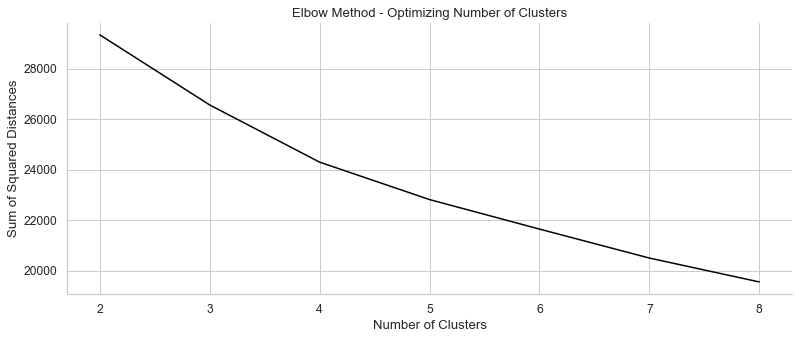

In [59]:
# Checking Elbow Method plot:
apply_elbow_method(cluster_df)

It's possible to see that the most expressive inclination change happens with 4 clusters.

Because of that, the cluster analysis will be performed by dividing the customers into **4 different groups**.

### 4.3 Clustering Customers<a name="clustering"></a>

In [60]:
# Training KMeans algorithm::
# Instatiating KMeans algorithm for n clusters:
kmeans = KMeans(n_clusters = 4, random_state = 301)
    
# Fitting to data:
kmeans.fit(cluster_df)

KMeans(n_clusters=4, random_state=301)

### 4.4 Analyzing Clusters<a name="clustergroups"></a>

In [61]:
# Creating a function that, given one specific cluster, returns the most important features associated with it:
def cluster_most_important_features(cluster, kmeans = kmeans, top_features = 5):
    '''
    Given one specific cluster, it searches for the most important features associated to it.
    
    Input:
    cluster: integer indicating the target cluster (0-3);
    kmeans: trained kmeans model
    top_features: number of most important components to be analyzed.
    '''
    # Getting cluster center:
    cluster_centers = kmeans.cluster_centers_[cluster]
    
    # Getting more important components - positive values:
    pos_idx = np.argsort(cluster_centers)[::-1]
    pos_idx = pos_idx[:top_features]
    
    # Getting more important components - negative values:
    neg_idx = np.argsort(cluster_centers)
    neg_idx = neg_idx[:top_features]
    
    # Extracting most important features:
    print('+ Values: Principal Features with Highest Impact on Cluster {}:'.format(cluster))
    print('--------------------------------------------------------------')
    for idx in pos_idx:
        print(cluster_df.columns.values[idx])
        
    print('\n- Values: Principal Features with Highest Impact on Cluster {}:'.format(cluster))
    print('--------------------------------------------------------------')
    for idx in neg_idx:
        print(cluster_df.columns.values[idx])

#### 4.4.1 The Traditional Shoppers<a name="clust0"></a>

In [62]:
# Cluster 0:
cluster_most_important_features(0, top_features = 5)

+ Values: Principal Features with Highest Impact on Cluster 0:
--------------------------------------------------------------
avg_Wines_per_month
avg_StorePrch_per_month
avg_CatalogPrch_per_month
avg_WebPrch_per_month
avg_MeatProds_per_month

- Values: Principal Features with Highest Impact on Cluster 0:
--------------------------------------------------------------
Kidhome
Teenhome
Recency
Income_Group_20.000-29.999
Education_Basic


This group represents customers with the following characteristics:
* they spend higher amounts per month on wine;

* most of them have no children (kids or teenagers);

* although their main product is the wine, they also are related to high amounts spent on other different products;

* they prefer to buy the products directly at the store or through catalogs;

* they are related to higher values of household income, and they probably hold a Graduation degree;

* they probably purchase products with higher frequency than others.

#### 4.4.2 The Family-Starters  Occasional Shoppers<a name="clust1"></a>

In [63]:
# Cluster 1:
cluster_most_important_features(1, top_features = 5)

+ Values: Principal Features with Highest Impact on Cluster 1:
--------------------------------------------------------------
Kidhome
Education_Graduation
Marital_Status_Married
Age_Group_40-49
Age_Group_30-39

- Values: Principal Features with Highest Impact on Cluster 1:
--------------------------------------------------------------
avg_Wines_per_month
avg_CatalogPrch_per_month
avg_MeatProds_per_month
avg_SweetProds_per_month
avg_StorePrch_per_month


This group represents customers with the following characteristics:
* they are mostly represented by couples (married or not) with kids;

* they are mostly between 30 and 49 years old;

* they don't spend high amounts per month on any products, and they mostly earn low to medium incomes;

* most of them also hold a Graduation degree;

* apparently they don't usually respond to marketing campaigns.

#### 4.4.3 The Light Shoppers<a name="clust2"></a>

In [64]:
# Cluster 2:
cluster_most_important_features(2, top_features = 5)

+ Values: Principal Features with Highest Impact on Cluster 2:
--------------------------------------------------------------
avg_FishProds_per_month
avg_Fruits_per_month
avg_MeatProds_per_month
avg_CatalogPrch_per_month
avg_GoldProds_per_month

- Values: Principal Features with Highest Impact on Cluster 2:
--------------------------------------------------------------
Kidhome
Teenhome
Recency
Income_Group_<20.000
Income_Group_30.000-39.999


This group represents customers with the following characteristics:
* they can also be considered shoppers, but they stand out for the high values spent on fish, fruits, and meat;

* their purchases are specially made through catalogs;

* they don't tend to have children (kids or teenagers);

* they are associated with the highest household incomes classes (over 70k);

* they also are frequent customers, associated with lower values of recency purchase.

#### 4.4.4 The Well-Educated Occasional Shoppers<a name="clust3"></a>

In [65]:
# Cluster 3:
cluster_most_important_features(3, top_features = 5)

+ Values: Principal Features with Highest Impact on Cluster 3:
--------------------------------------------------------------
Education_Graduation
Marital_Status_Married
Age_Group_50-59
Age_Group_40-49
Marital_Status_Together

- Values: Principal Features with Highest Impact on Cluster 3:
--------------------------------------------------------------
Kidhome
avg_DealsPrch_per_month
avg_StorePrch_per_month
avg_WebPrch_per_month
avg_FishProds_per_month


This group represents customers with the following characteristics:
* they can be from different ages, but they are all well-educated, holding a Graduation degree or even a PhD;

* they are associated with medium and high household incomes, but they don't spend high amounts per month on the company's products;

* they don't have kids;

* they also might be pictured as traditional shoppers considering their product preferences, but they spend low amounts per month on these products.

### 4.5 Cluster Insights<a name="insights"></a>

Now, we are going to use these different groups to see if we can find some special relationship between the groups and the campaign response.

In [66]:
# Predicting clusters on customers data:
cust_df['Cluster'] = kmeans.predict(cluster_df)
cust_df['Cluster'] = ['Trad_Shoppers' if cust_df.Cluster[i] == 0 \
                      else 'Fam_Starters' if cust_df.Cluster[i] == 1 \
                      else 'Light_Shoppers' if cust_df.Cluster[i] == 2 \
                      else 'Well_Educated' \
                      for i in range(cust_df.shape[0])]

In [67]:
# Checking group occurrence:
cust_df.Cluster.value_counts(normalize = True)*100

Well_Educated     51.294643
Fam_Starters      41.473214
Trad_Shoppers      6.428571
Light_Shoppers     0.803571
Name: Cluster, dtype: float64

We can see that most of the clients are classified as **Well-Educated** (over 50% of the customers). 

The second in the rank, **Family-Starters** represents over 40% of the customers.

Traditional-Shoppers represent about 6% of the customers, while Light-Shoppers represent less than 1%.

Clients that spend the highest amounts per month on the company's products represent the lowest portion of the customers, indicating that the base core customer profile is composed of well-educated people that spend lower amounts per month on the company's products.

In [68]:
# Creating Cluster dataframe by Response:
# 0
cluster0_df = pd.DataFrame(columns = ['Cluster', 'Percentage'])
cluster0_df['Cluster'] = cust_df[cust_df.Response == 0].Cluster.value_counts(normalize = True).index.values
cluster0_df['Percentage'] = cust_df[cust_df.Response == 0].Cluster.value_counts(normalize = True).values * 100
cluster0_df['Response'] = 0

# 1:
cluster1_df = pd.DataFrame(columns = ['Cluster', 'Percentage'])
cluster1_df['Cluster'] = cust_df[cust_df.Response == 1].Cluster.value_counts(normalize = True).index.values
cluster1_df['Percentage'] = cust_df[cust_df.Response == 1].Cluster.value_counts(normalize = True).values * 100
cluster1_df['Response'] = 1

# Concatenating:
cluster_resp_df = pd.concat([cluster0_df, cluster1_df], ignore_index = True)

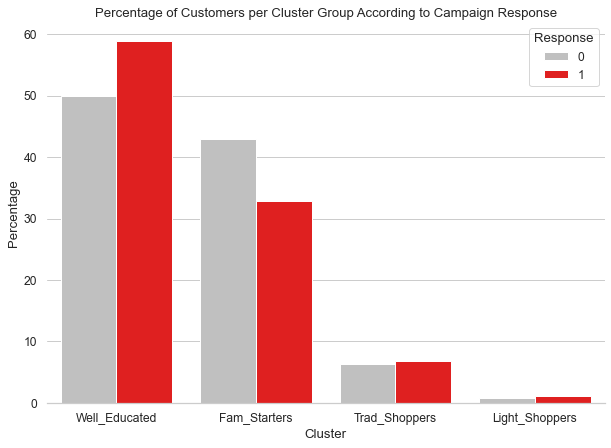

In [69]:
# Defining figure:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

# Defining barplot:
sns.barplot(x = 'Cluster', 
            y = 'Percentage', 
            hue = 'Response',
            data = cluster_resp_df,
            order = ['Well_Educated', 'Fam_Starters', 'Trad_Shoppers', 'Light_Shoppers'],
            ci = None, 
            palette = palette, 
            ax = ax).set(
    title = 'Percentage of Customers per Cluster Group According to Campaign Response')

# Customizing borders:
sns.despine(left=True, top = True)

# Saving figure:
fig.savefig('plots\plot12.png')

# Showing the figure:
fig.show()

Proportionally we can say that **Well-Educated Occasional Shoppers** and **Light Shoppers** are especially responsive to the marketing campaign.

Although **The Family Starters** represent a high portion of the responsive customers, this group is highly underrepresented when comparing to the ones that didn't respond to the campaign.

In [70]:
# Checking the percentage of customers that responded to the campaign per group:
print('Well Educated:')
cust_df[cust_df.Cluster == 'Well_Educated'].Response.value_counts(normalize = True) * 100

Well Educated:


0    82.854656
1    17.145344
Name: Response, dtype: float64

In [71]:
print('Family Starters:')
cust_df[cust_df.Cluster == 'Fam_Starters'].Response.value_counts(normalize = True) * 100

Family Starters:


0    88.159311
1    11.840689
Name: Response, dtype: float64

In [72]:
print('Traditional Shoppers:')
cust_df[cust_df.Cluster == 'Trad_Shoppers'].Response.value_counts(normalize = True) * 100

Traditional Shoppers:


0    84.027778
1    15.972222
Name: Response, dtype: float64

In [73]:
print('Light Shoppers:')
cust_df[cust_df.Cluster == 'Light_Shoppers'].Response.value_counts(normalize = True) * 100

Light Shoppers:


0    77.777778
1    22.222222
Name: Response, dtype: float64

## 5. Optimizing Marketing Campaign Response<a name="optimize"></a>

In order to target customers that are more likely to respond to the marketing campaign, we are going to train a machine learning algorithm in a supervised task.

This section will be developed following a few steps:
* defining data transformation pipeline;
* analyzing learning curves;
* defining machine learning pipeline;
* training and evaluating the models.

### 5.1 Data Transformation Pipeline <a name="datapipe"></a>

In [74]:
# Defining data transformation pipeline:
# Final columns to be used on supervised machine learning task:
selected_cols = ['Age_Group', 'Education', 'Income_Group', 'Marital_Status', 'Kidhome', 'Recency', 'Teenhome', 
                 'avg_FishProds_per_month', 'avg_MeatProds_per_month', 'avg_Fruits_per_month', 'avg_SweetProds_per_month', 
                 'avg_Wines_per_month', 'avg_GoldProds_per_month', 'avg_CatalogPrch_per_month', 'avg_DealsPrch_per_month', 
                 'avg_StorePrch_per_month', 'avg_WebPrch_per_month', 'Total_Prev_Response', 'Complain', 'Response']

# Categorical features will be one-hot encoded:
cat_feat = ['Age_Group', 'Education', 'Income_Group', 'Marital_Status']

# Defining categorical transformer:
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown = 'ignore'))])

# Numerical features will be standardized:
num_feat = ['Kidhome', 'Recency', 'Teenhome', 'avg_FishProds_per_month', 'avg_MeatProds_per_month', 
            'avg_Fruits_per_month', 'avg_SweetProds_per_month', 'avg_Wines_per_month', 'avg_GoldProds_per_month', 
            'avg_CatalogPrch_per_month', 'avg_DealsPrch_per_month', 'avg_StorePrch_per_month', 'avg_WebPrch_per_month', 
            'Total_Prev_Response', 'Complain']

# Defining numerical transformer:
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# Encapsulating transformers:
preprocessing = ColumnTransformer(transformers = [
    ('cat', cat_transformer, cat_feat), 
    ('num', num_transformer, num_feat)
])

In [75]:
# CatBoostClassifier doesn't need categorical variables to be encoded:
# Encapsulating transformers for CatBoostClassifier:
preprocessing_cat = ColumnTransformer(transformers = [
    ('num', num_transformer, num_feat)
])

### 5.2 Learning Curves<a name="learningcurves"></a>

In [76]:
# Defining a function to plot the learning curves:
def plot_learning_curves(X, y, model, steps):
    '''
    It plots the learning curve for the desired algorithm.
    
    Input:
    X: predictive features;
    y: target feature;
    model: instantiated object of the algorithm to be trained;
    steps: integer defining the steps for training size.
    '''
    # Setting train_sizes:
    train_sizes = np.linspace(0.1, 1.0, steps)
    
    # Applying sklearn learning_curve:
    train_size, train_score, test_score = learning_curve(model, X, y, 
                                                         scoring = 'roc_auc', 
                                                         train_sizes = train_sizes)
    # Computing average train and test scores:
    avg_train_score = np.mean(train_score, axis = 1)
    avg_test_score = np.mean(test_score, axis = 1)
    
    # Printing results:
    print("ROC_AUC train score: {:.2f}".format(avg_train_score[-1]))
    print("ROC_AUC valid. score: {:.2f}".format(avg_test_score[-1]))
    
    # Creating learning curve plot:
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))

    sns.lineplot(x = train_sizes * 100, y = avg_train_score, 
                 marker = 'o', color = 'black', 
                 label = 'Train', ax = ax).set(xlabel = 'Training Set Percentage', 
                                               ylabel = 'Model Score', 
                                               title = 'Learning Curve')

    sns.lineplot(x = train_sizes * 100, y = avg_test_score, 
                 marker = 'o', color = 'red', 
                 label = 'Validation', ax = ax)

    sns.despine(left=True, top = True)

    fig.show()

XGBClassifier
ROC_AUC train score: 1.00
ROC_AUC valid. score: 0.89


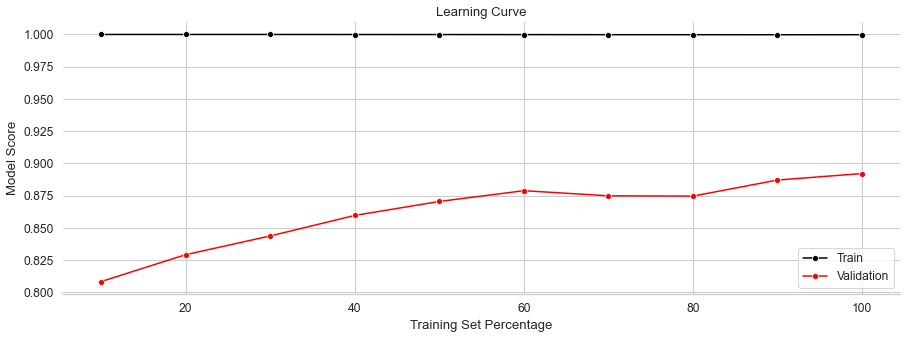

In [77]:
# XGBClassifier
 
# Print classifier's name:
print('XGBClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing), 
    ('clf', XGBClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = cust_df[selected_cols].copy()
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['Response']
rand_X = rand_df.drop(['Response'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

AdaBoostClassifier
ROC_AUC train score: 0.95
ROC_AUC valid. score: 0.88


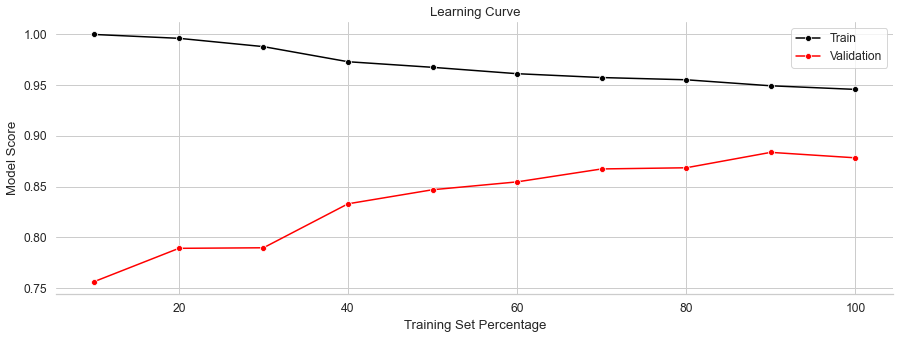

In [78]:
# AdaBoostClassifier
 
# Print classifier's name:
print('AdaBoostClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing), 
    ('clf', AdaBoostClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = cust_df[selected_cols].copy()
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['Response']
rand_X = rand_df.drop(['Response'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

GradientBoostingClassifier
ROC_AUC train score: 0.98
ROC_AUC valid. score: 0.89


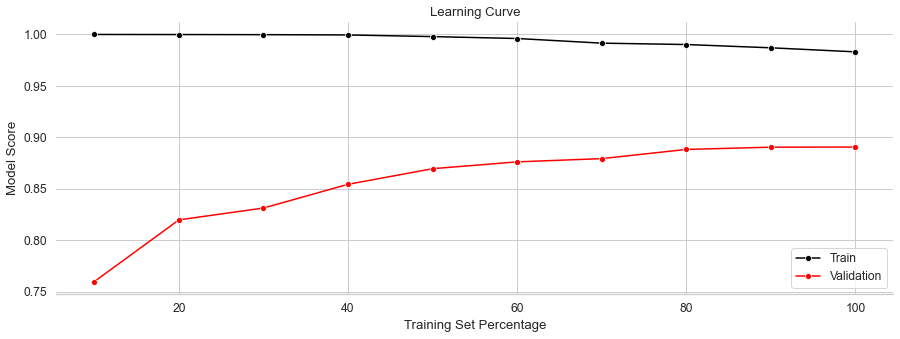

In [79]:
# GradientBoostingClassifier
 
# Print classifier's name:
print('GradientBoostingClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing), 
    ('clf', GradientBoostingClassifier())
])
    
# Creating a randomized version of the train dataframe:
df = cust_df[selected_cols].copy()
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['Response']
rand_X = rand_df.drop(['Response'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

CatBoostClassifier
ROC_AUC train score: 1.00
ROC_AUC valid. score: 0.89


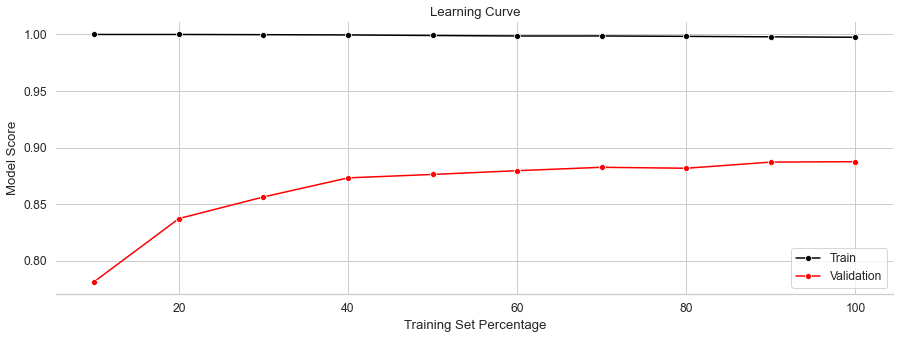

In [80]:
# CatBoostClassifier
 
# Print classifier's name:
print('CatBoostClassifier')
    
# Defining machine learning pipeline:
ml_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing_cat), 
    ('clf', CatBoostClassifier(verbose = 0))
])
    
# Creating a randomized version of the train dataframe:
df = cust_df[selected_cols].copy()
rand_df = df.sample(frac = 1)
    
# Creating X_train and y_train objects:
rand_y = rand_df['Response']
rand_X = rand_df.drop(['Response'], axis = 1)
    
# Plotting learning curve:
plot_learning_curves(rand_X, rand_y, ml_pipe, 10)

We can see that most of the models show signs of **overfitting** when considering the **train score**

On the other hand, we can see that the **validation learning curve keeps growing** while more data is added to the train set, indicating that the model is learning.

Since the model that showed the **best validation score** was the **XGBClassifier**, we are going to refine it, looking for its best parameters' combination.

### 5.3 Training and Evaluating the Models<a name="traineval"></a>

For this task, data will be divided into train and test sets. The train set will be automatically divided into train and validation sets during the BayesSearchCV process.

In this case, we are using a test set with 10% of the total data.

In [81]:
# Selecting data:
df = cust_df[selected_cols]
X = cust_df.drop(['Response'], axis = 1)
y = cust_df['Response']

# Defining test size:
test_size = 0.1

# Dividing data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size, 
                                                    random_state = 401)

In [82]:
# Defining machine learning pipeline:
xgb_ml_pipe = Pipeline(steps = [
    ('preprocessing', preprocessing), 
    ('clf', XGBClassifier(random_state = 403))
])

# Setting parameters to be tested:
xgb_params = {'clf__booster': Categorical(['gbtree', 'dart']), 
              'clf__learning_rate': Real(0.01, 0.3), 
              'clf__gamma': Integer(0, 100), 
              'clf__min_child_weight': Integer(0, 10),
              'clf__reg_lambda': Integer(1, 100), 
              'clf__reg_alpha': Integer(0, 100), 
              'clf__tree_method': Categorical(['auto', 'hist']),
              'clf__max_depth': Integer(2, 10)
             }

# Defining function to display scores:
def show_score(optim_result):
    '''
    It shows iteration scores during Bayesian Optimization
    '''
    # Computing score:
    score = xgb_clf.best_score_
    print('Best ROC_AUC Score:{:.4f}\n'.format(score))
    
    # Early stop:
    if score >= 0.92:
        print('0.92 ROC_AUC score achieved!')
        
        return True

# BayesSearchCV + ML pipleine:
xgb_clf = BayesSearchCV(xgb_ml_pipe, xgb_params, scoring = 'roc_auc', cv = 5, verbose = 0, random_state = 403)

# Training model:
xgb_clf.fit(X_train, y_train, callback = show_score)

Best ROC_AUC Score:0.7032

Best ROC_AUC Score:0.7032

Best ROC_AUC Score:0.7032

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7100

Best ROC_AUC Score:0.7895

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8888

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8894

Best ROC_AUC Score:0.8927

Best ROC_AUC Score:0.8927

Best ROC_AUC Score:0.8927

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

Best ROC_AUC Score:0.9004

B

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('cat',
                                                                          Pipeline(steps=[('encoder',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['Age_Group',
                                                                           'Education',
                                                                           'Income_Group',
                                                                           'Marital_Status']),
                                                                         ('num',
                                                                          Pipeline(steps=[('scaler',
                                                             

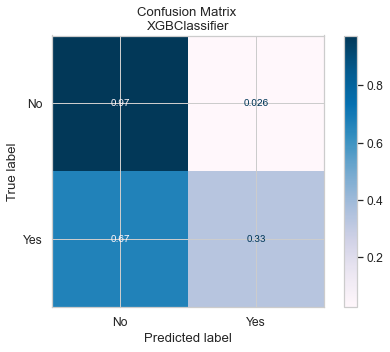

In [83]:
# Evaluating the model on test set:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))

class_names = ['No', 'Yes']

plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels = class_names, cmap = plt.cm.PuBu,
                      normalize = 'true', ax = ax)
ax.set_title('Confusion Matrix \nXGBClassifier')

# Saving figure:
fig.savefig('plots\plot13.png')

fig.show()

This model does a good job when identifying customers that are not likely to respond to the campaign, but it performs poorly when it comes to identifying the customers that are likely to respond to the campaign (it identified about 30% of these customers).

Even with this consideration, the model could already be **helpful** while targeting the clients. Instead of using the final predicted label, the company could use the **predicted probability**, selecting clients related to a specific **threshold** probability to respond to the campaign.

However, let's try to improve this model using the **SMOTE** technique to create a few synthetic data to deal with the imbalance shown in the data labels.

In [84]:
# Defining machine learning pipeline:
xgb_smote_ml_pipe = Pipeline_imb(steps = [
    ('preprocessing', preprocessing),
    ('smote', SMOTE(random_state = 403)),
    ('clf', XGBClassifier(random_state = 403))
])

# Setting parameters to be tested:
xgb_smote_params = {'smote__sampling_strategy': Real(.25, 1), 
                    'clf__booster': Categorical(['gbtree', 'dart']), 
                    'clf__learning_rate': Real(0.01, 0.3), 
                    'clf__gamma': Integer(0, 100), 
                    'clf__min_child_weight': Integer(0, 10),
                    'clf__reg_lambda': Integer(1, 100), 
                    'clf__reg_alpha': Integer(0, 100), 
                    'clf__tree_method': Categorical(['auto', 'hist']), 
                    'clf__max_depth': Integer(2, 10)
                   }

# Defining function to display scores:
def show_score(optim_result):
    '''
    It shows iteration scores during Bayesian Optimization
    '''
    # Computing score:
    score = xgb_smote_clf.best_score_
    print('Best ROC_AUC Score:{:.4f}\n'.format(score))
    
    # Early stop:
    if score >= 0.92:
        print('0.92 ROC_AUC score achieved!')
        
        return True

# BayesSearchCV + ML pipleine:
xgb_smote_clf = BayesSearchCV(xgb_smote_ml_pipe, xgb_smote_params, scoring = 'roc_auc', cv = 5, verbose = 0, random_state = 404)

# Training model:
xgb_smote_clf.fit(X_train, y_train, callback = show_score)

Best ROC_AUC Score:0.8096

Best ROC_AUC Score:0.8096

Best ROC_AUC Score:0.8096

Best ROC_AUC Score:0.8239

Best ROC_AUC Score:0.8239

Best ROC_AUC Score:0.8239

Best ROC_AUC Score:0.8239

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8257

Best ROC_AUC Score:0.8379

Best ROC_AUC Score:0.8379

Best ROC_AUC Score:0.8379

Best ROC_AUC Score:0.8379

Best ROC_AUC Score:0.8833

Best ROC_AUC Score:0.8833

Best ROC_AUC Score:0.8877

Best ROC_AUC Score:0.8914

Best ROC_AUC Score:0.8914

Best ROC_AUC Score:0.8914

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

Best ROC_AUC Score:0.8945

B

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('cat',
                                                                          Pipeline(steps=[('encoder',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['Age_Group',
                                                                           'Education',
                                                                           'Income_Group',
                                                                           'Marital_Status']),
                                                                         ('num',
                                                                          Pipeline(steps=[('scaler',
                                                             

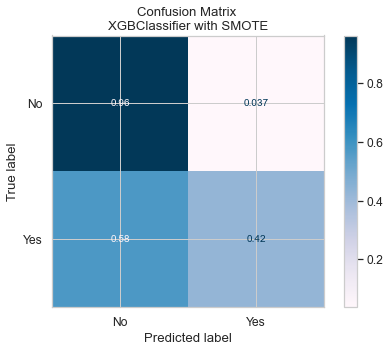

In [85]:
# Evaluating the model on test set:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))

plot_confusion_matrix(xgb_smote_clf, X_test, y_test, display_labels = class_names, cmap = plt.cm.PuBu,
                      normalize = 'true', ax = ax)
ax.set_title('Confusion Matrix \nXGBClassifier with SMOTE')

# Saving figure:
fig.savefig('plots\plot14.png')

fig.show()

Using the **SMOTE** technique, we could improve the percentage of identified customers that responded to the marketing campaign: about 40% of them were correctly targeted.

However, we had a decrease in the percentage of identified clients that didn't respond to the campaign: 96% of them were correctly classified, against 97% from the previous model.  

### 5.4 Feature Importance<a name="featimp"></a>

Using these classifiers, we can check the features that are more important to differ customers that are responsive to the campaign from the ones that are not.

In [86]:
# Extracting feature names from encoder transformer:
cat_col_names = list(xgb_smote_clf.best_estimator_.named_steps['preprocessing'].transformers_[0][1].named_steps['encoder']\
.get_feature_names(cat_feat))

cat_col_names

['Age_Group_30-39',
 'Age_Group_40-49',
 'Age_Group_50-59',
 'Age_Group_<30',
 'Age_Group_>=60',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Income_Group_20.000-29.999',
 'Income_Group_30.000-39.999',
 'Income_Group_40.000-49.999',
 'Income_Group_50.000-59.999',
 'Income_Group_60.000-69.999',
 'Income_Group_70.000-79.999',
 'Income_Group_<20.000',
 'Income_Group_>=80.000',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

In [87]:
# Joining categorical and numerical column names:
final_cols = cat_col_names + num_feat

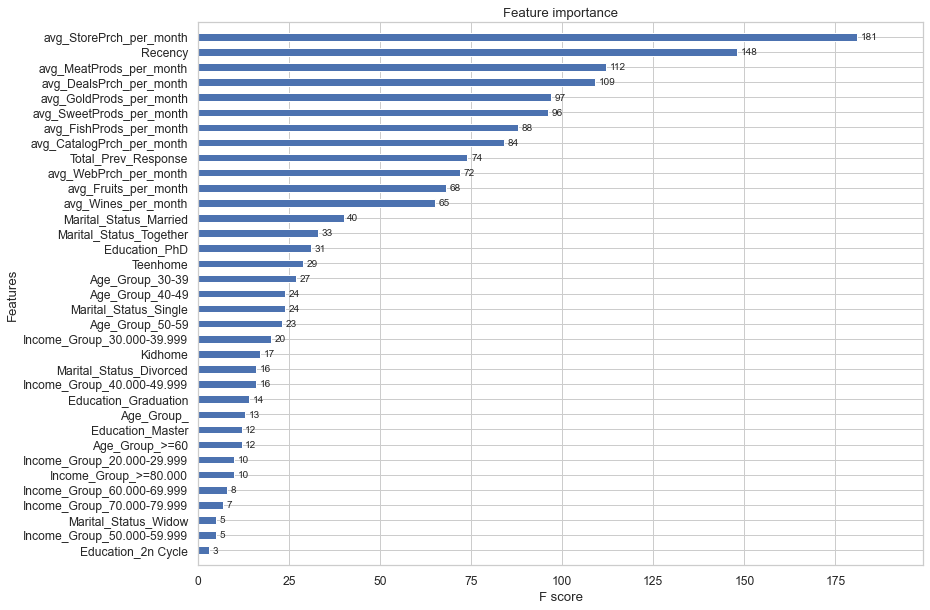

In [88]:
# Extracting best xgboost estimator:
xgb = xgb_smote_clf.best_estimator_.named_steps['clf']

# Designaiting column names:
xgb.get_booster().feature_names = final_cols

# Plotting Feature Importance:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 10))

plot_importance(xgb, height = .5, ax = ax)

# Saving figure:
fig.savefig('plots\plot15.png')

fig.show()

When considering the **feature importance**, we can see that **behavioral purchasing characteristics** such as *average monthly amount spent on products* and the *channels used to make the purchases* are more important to differentiate the two types of customers than **personal information** such as *household incomes* and *marital status*.

### 5.5 Second Attempt: GradientBoostingClassifier<a name="2ndattempt"></a>

In [89]:
# Defining machine learning pipeline:
gbc_smote_ml_pipe = Pipeline_imb(steps = [
    ('preprocessing', preprocessing),
    ('smote', SMOTE(random_state = 405)),
    ('clf', GradientBoostingClassifier(max_features = 'auto', random_state = 405))
])

# Setting parameters to be tested:
gbc_smote_params = {'smote__sampling_strategy': Real(.25, 1), 
                    'clf__loss': Categorical(['deviance', 'exponential']), 
                    'clf__learning_rate': Real(0.01, 0.3), 
                    'clf__n_estimators': Integer(100, 500), 
                    'clf__min_samples_split': Integer(2, 10),
                    'clf__min_samples_leaf': Integer(1, 5), 
                    'clf__max_depth': Integer(3, 10)
                   }

# Defining function to display scores:
def show_score(optim_result):
    '''
    It shows iteration scores during Bayesian Optimization
    '''
    # Computing score:
    score = gbc_smote_clf.best_score_
    print('Best ROC_AUC Score:{:.4f}\n'.format(score))
    
    # Early stop:
    if score >= 0.92:
        print('0.92 ROC_AUC score achieved!')
        
        return True

# BayesSearchCV + ML pipleine:
gbc_smote_clf = BayesSearchCV(gbc_smote_ml_pipe, gbc_smote_params, scoring = 'roc_auc', cv = 5, verbose = 0, random_state = 405)

# Training model:
gbc_smote_clf.fit(X_train, y_train, callback = show_score)

Best ROC_AUC Score:0.8783

Best ROC_AUC Score:0.8787

Best ROC_AUC Score:0.8801

Best ROC_AUC Score:0.8925

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8948

Best ROC_AUC Score:0.8965

Best ROC_AUC Score:0.8965

Best ROC_AUC Score:0.8965

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

Best ROC_AUC Score:0.9011

B

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('preprocessing',
                                         ColumnTransformer(transformers=[('cat',
                                                                          Pipeline(steps=[('encoder',
                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                          ['Age_Group',
                                                                           'Education',
                                                                           'Income_Group',
                                                                           'Marital_Status']),
                                                                         ('num',
                                                                          Pipeline(steps=[('scaler',
                                                             

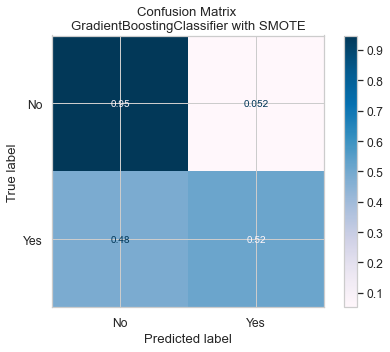

In [90]:
# Evaluating the model on test set:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))

plot_confusion_matrix(gbc_smote_clf, X_test, y_test, display_labels = class_names, cmap = plt.cm.PuBu,
                      normalize = 'true', ax = ax)
ax.set_title('Confusion Matrix \nGradientBoostingClassifier with SMOTE')

# Saving figure:
fig.savefig('plots\plot16.png')

fig.show()

Overall, this was the best model: it increased the correct identification of clients that responded to the campaign (52% of them were correctly identified), and although we had a decrease in the correct identification of clients that didn't respond to the campaign (95% against 96% and 97% from the previous models), it's still a good score.

The strategy to increase the profit generated by this campaign would be:
* run this model on the overall client base;
* define an accepted threshold probability for the client to be responsive to the campaign;
* make the offer to those who surpass the threshold probability.

Since the campaign costs 3MU per customer and each client who accepts the offer generates 11MU of profit, excluding customers that are not likely to respond to the campaign will optimize the overall campaign profit.

## 6. Recommendations<a name="recomm"></a>

After this analysis, there are a few recommendations that the company could apply to improve its performance:

### 6.1 Mobile App<a name="recomm1"></a>

Building a mobile app could be a simple way to easily connect to its customers.

Marketing campaigns could be sent to the clients through push-up notifications, with the potential of reaching out to the customers at a faster pace.

Also, promotions and discounts could be announced through the app, encouraging customers to download the company's app, boosting this communication channel.

### 6.2 Loyalty Program<a name="recomm2"></a>

From the cluster analysis, we could see that the customers related to higher monthly amounts spent on the products represent the minority of the clients.

With that in mind, to encourage the other profiles to buy more products with a higher frequency, the company could develop a *Loyalty Program*, establishing a few advantages such as:
* if the customer achieves some monthly purchases or a certain monthly amount spent on the products, it will be offered a special discount on the next purchase;
* the more they buy, the higher the discount offered;
* customers who achieve a certain amount spent on products each month will compete for a ticket to be spent on any products over one month.